In [1]:
%pip install pandas numpy matplotlib scikit-learn keras
%pip instlal setuptools pydot


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
ERROR: unknown command "instlal" - maybe you meant "install"
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from keras.api.models import Sequential
from keras.api.layers import Dense, LSTM

2024-08-06 11:08:08.388625: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-06 11:08:08.580281: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-06 11:08:08.771182: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-06 11:08:08.937016: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-06 11:08:08.991323: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-06 11:08:09.304316: I tensorflow/core/platform/cpu_feature_gu

In [51]:
df = pd.read_csv('AAPL.csv')

In [52]:
data = df.filter(['Close'])
dataset = data.values
# take 95% of data to train
training_data_len = int(np.ceil(len(dataset) * .95))

training_data_len

10449

In [53]:
# scale data for better model training
scaler = MinMaxScaler(feature_range=(0,1))
log_transformer = FunctionTransformer(lambda x: np.log(x))
scaled_data = log_transformer.fit_transform(dataset)
scaled_data = scaler.fit_transform(scaled_data)

In [54]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.1130174 , 0.10354999, 0.09325833, 0.10354999, 0.10354999,
       0.1130174 , 0.1130174 , 0.12178285, 0.1299433 , 0.13757688,
       0.13757688, 0.13757688, 0.1299433 , 0.1299433 , 0.1299433 ,
       0.12178285, 0.12178285, 0.12178285, 0.12178285, 0.12178285,
       0.12178285, 0.12178285, 0.12178285, 0.12178285, 0.1299433 ,
       0.12178285, 0.1299433 , 0.1299433 , 0.1299433 , 0.12178285,
       0.12178285, 0.12178285, 0.1130174 , 0.1130174 , 0.10354999,
       0.10354999, 0.1130174 , 0.1130174 , 0.1130174 , 0.10354999,
       0.10354999, 0.10354999, 0.10354999, 0.09325833, 0.10354999,
       0.10354999, 0.09325833, 0.09325833, 0.09325833, 0.09325833,
       0.09325833, 0.09325833, 0.10354999, 0.10354999, 0.10354999,
       0.10354999, 0.10354999, 0.09325833, 0.09325833, 0.08198509])]
[0.08198509140863319]

[array([0.1130174 , 0.10354999, 0.09325833, 0.10354999, 0.10354999,
       0.1130174 , 0.1130174 , 0.12178285, 0.1299433 , 0.13757688,
       0.13757688, 0.13757688, 0.12

In [55]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10


/home/yuu/Code/stock-market-data-set/.env/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10389/10389 ━━━━━━━━━━━━━━━━━━━━ 191s 18ms/step - loss: 0.0013
Epoch 2/10
10389/10389 ━━━━━━━━━━━━━━━━━━━━ 184s 18ms/step - loss: 1.6627e-04
Epoch 3/10
10389/10389 ━━━━━━━━━━━━━━━━━━━━ 179s 17ms/step - loss: 9.2977e-05
Epoch 4/10
10389/10389 ━━━━━━━━━━━━━━━━━━━━ 178s 17ms/step - loss: 8.8787e-05
Epoch 5/10
10389/10389 ━━━━━━━━━━━━━━━━━━━━ 178s 17ms/step - loss: 6.9904e-05
Epoch 6/10
10389/10389 ━━━━━━━━━━━━━━━━━━━━ 179s 17ms/step - loss: 5.6541e-05
Epoch 7/10
10389/10389 ━━━━━━━━━━━━━━━━━━━━ 178s 17ms/step - loss: 7.0914e-05
Epoch 8/10
10389/10389 ━━━━━━━━━━━━━━━━━━━━ 179s 17ms/step - loss: 4.8934e-05
Epoch 9/10
10389/10389 ━━━━━━━━━━━━━━━━━━━━ 253s 24ms/step - loss: 5.0598e-05
Epoch 10/10
10389/10389 ━━━━━━━━━━━━━━━━━━━━ 270s 25ms/step - loss: 4.9320e-05


In [56]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
exp_transformer = FunctionTransformer(lambda x: np.exp(x))
predictions = exp_transformer.transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


4.442200893889378

/tmp/ipykernel_2933/453868555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


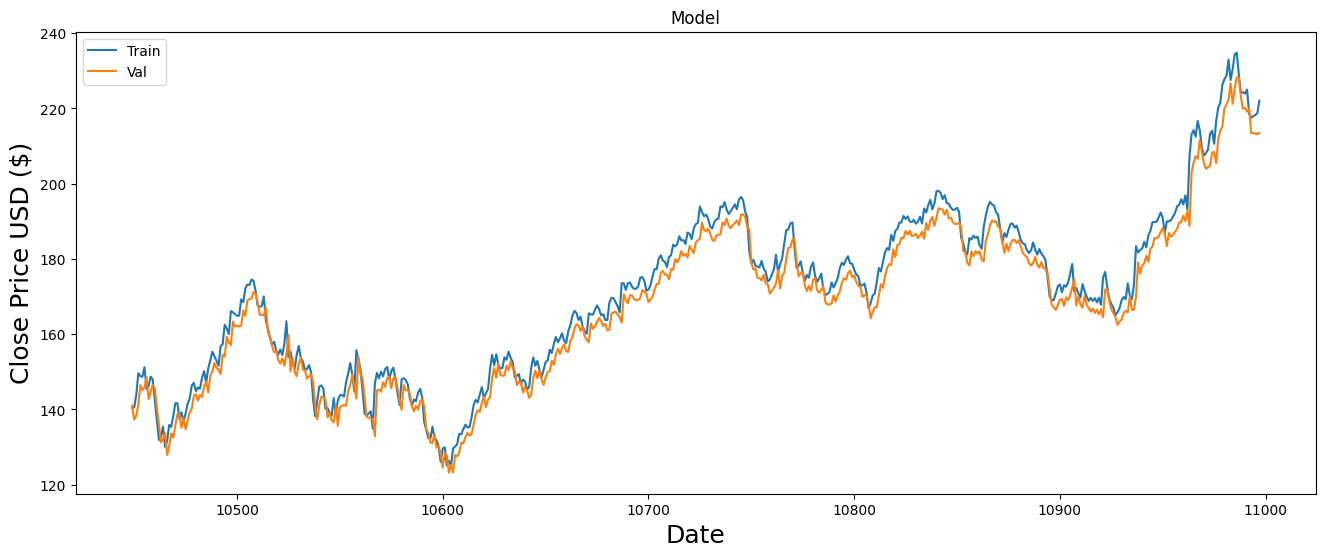

In [57]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()